# Install Package Needed

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


## Get Times New Roman Font

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
print(mpl.__version__)

!wget -O TimesNewRoman.ttf https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
font_dirs = ["/content/"]
font_files = fm.findSystemFonts(fontpaths=font_dirs, fontext='ttf')
for font_file in font_files:
    print(font_file) if 'TimesNewRoman' in font_file else None
    fm.fontManager.addfont(font_file)

3.10.0
--2025-04-16 00:58:12--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-04-16 00:58:12--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘TimesNewRoman.ttf’

TimesNewRoman.ttf   100%[===================>] 814.89K  --.-KB/s    in 0.03s   

2025-04-16 00:58:12 (23.2 MB/s) - ‘TimesNewRoman.ttf’ saved [834452/834452]

/c

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, GlobalAveragePooling1D, Input, MaxPooling1D, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from keras.callbacks import CSVLogger
from keras_tuner import HyperParameters, RandomSearch, GridSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
tf.random.set_seed(42)
df = pd.read_excel("Coffe Brewing Level - Spectroscopy.xlsx")
sample = df.sample(20)
sample.head(20)

410nm     435nm     460nm     485nm     510nm      535nm     560nm  \
107   4.229255  0.966277  1.861446  0.885403  3.017060  11.156102  1.307779   
50   10.150212  1.932554  5.584338  0.885403  2.262795   8.367077  0.871853   
48    5.920957  1.932554  3.722892  0.885403  2.262795   9.761589  0.871853   
101   4.229255  0.966277  1.861446  0.885403  3.771325  11.156102  1.307779   
22   10.150212  2.898831  6.515061  0.885403  2.262795   7.669820  0.871853   
119  10.150212  2.898831  6.515061  1.770806  3.017060   5.578051  1.307779   
0    11.841914  2.898831  7.445784  1.770806  3.017060   6.972564  0.435926   
139   5.920957  1.932554  3.722892  0.885403  3.017060  11.156102  0.871853   
11   10.150212  1.932554  5.584338  0.885403  3.017060  11.853358  1.307779   
140   6.766808  1.932554  2.792169  0.885403  1.508530   6.275308  0.871853   
6    11.841914  2.898831  7.445784  1.770806  3.017060   6.972564  0.435926   
85   13.533616  3.865108  9.307230  2.656209  3.771325   5.578051  0.871853   
147   5.920957  0.966277  2.792169  0.885403  2.262795   7.669820  1.307779   
144   5.920957  1.932554  2.792169  0.885403  2.262795   8.367077  0.871853   
111  10.150212  2.898831  6.515061  1.770806  3.017060   5.578051  1.307779   
95    9.304361  2.898831  6.515061  1.770806  3.017060   5.578051  1.743706   
113  10.150212  2.898831  6.515061  1.770806  3.017060   5.578051  1.307779   
141   6.766808  1.932554  2.792169  0.885403  1.508530   6.275308  0.871853   
87   13.533616  3.865108  9.307230  2.656209  3.771325   5.578051  0.871853   
18   10.150212  1.932554  5.584338  0.885403  3.017060  11.853358  1.307779   

     585nm     610nm     645nm     680nm     705nm     730nm     760nm  \
107  0.824  2.197717  0.746666  2.010596  0.353923  0.747948  0.781082   
50   0.824  2.197717  0.746666  1.005298  0.000000  0.747948  0.000000   
48   1.236  2.197717  0.746666  1.005298  0.353923  0.747948  0.000000   
101  0.824  2.197717  0.746666  1.005298  0.353923  0.747948  0.000000   
22   0.824  5.494293  0.746666  1.005298  0.353923  0.747948  0.781082   
119  1.648  4.395434  1.119999  1.005298  0.353923  0.747948  0.781082   
0    0.824  3.296576  0.746666  1.005298  0.353923  0.747948  0.781082   
139  0.824  3.296576  0.373333  1.005298  0.353923  0.747948  0.000000   
11   1.648  3.296576  1.119999  1.005298  0.353923  1.495895  0.781082   
140  0.824  3.296576  0.746666  1.005298  0.353923  0.747948  0.000000   
6    0.824  3.296576  0.746666  1.005298  0.353923  0.747948  0.781082   
85   1.236  6.593152  0.746666  1.005298  0.353923  0.747948  0.781082   
147  1.236  2.197717  0.746666  1.005298  0.353923  0.747948  0.000000   
144  1.236  2.197717  0.746666  1.005298  0.353923  0.747948  0.000000   
111  1.648  4.395434  1.119999  1.005298  0.353923  0.747948  0.781082   
95   1.648  5.494293  0.746666  1.005298  0.353923  0.747948  0.781082   
113  1.648  4.395434  1.119999  1.005298  0.353923  0.747948  0.000000   
141  1.236  3.296576  0.746666  1.005298  0.353923  0.747948  0.000000   
87   1.236  6.593152  0.746666  1.005298  0.353923  0.747948  0.781082   
18   1.648  3.296576  1.119999  1.005298  0.353923  0.747948  0.000000   

        810nm     860nm     900nm  940nm           Label_Temp           Label  
107  0.827006  2.199664  0.512009      0  Underdeveloped_Cold  Underdeveloped  
50   0.827006  1.099832  0.512009      0           Ideal_Warm           Ideal  
48   0.827006  1.099832  0.512009      0           Ideal_Cold           Ideal  
101  0.827006  2.199664  0.512009      0  Underdeveloped_Cold  Underdeveloped  
22   0.827006  2.199664  0.512009      0          Bitter_Warm          Bitter  
119  0.827006  1.099832  0.512009      0  Underdeveloped_Warm  Underdeveloped  
0    0.827006  1.099832  0.512009      0               Bitter          Bitter  
139  0.827006  1.099832  0.512009      0            Weak_Cold            Weak  
11   0.827006  1.099832  0.512009      0          Bitter_Cold          Bit

<ipython-input-8-a3ce1d6dcb17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette=palette)
<ipython-input-8-a3ce1d6dcb17>:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=df, x='Label', palette=palette)


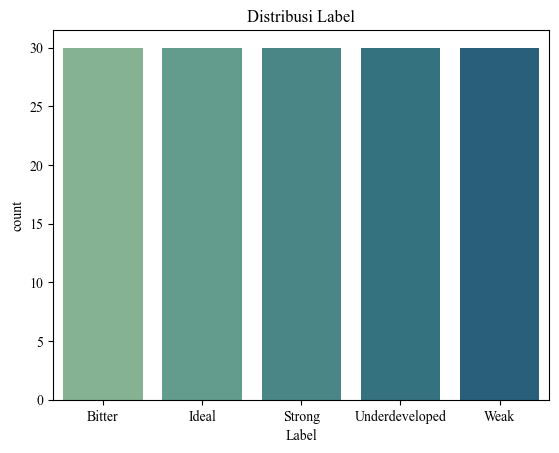

In [ ]:
plt.rcParams['font.serif'] = "Times New Roman"
plt.rcParams['font.family'] = "serif"
palette = sns.color_palette("crest")
sns.countplot(data=df, x='Label', palette=palette)
plt.xlabel("Label")
plt.title("Distribusi Label")
plt.show()

# Preprocessing

In [ ]:
# Applying encoder
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

# Get Classes
classes = encoder.classes_
print(classes)

# Inspect Data after encoded
df.head()

['Bitter' 'Ideal' 'Strong' 'Underdeveloped' 'Weak']


410nm     435nm     460nm     485nm     510nm     535nm     560nm  \
0  11.841914  2.898831  7.445784  1.770806  3.017060  6.972564  0.435926   
1  11.841914  2.898831  7.445784  1.770806  2.262795  6.972564  0.435926   
2  11.841914  2.898831  7.445784  1.770806  3.017060  6.972564  0.435926   
3  11.841914  2.898831  7.445784  1.770806  3.017060  6.972564  0.435926   
4  11.841914  2.898831  7.445784  1.770806  3.017060  6.972564  0.435926   

   585nm     610nm     645nm     680nm     705nm     730nm     760nm  \
0  0.824  3.296576  0.746666  1.005298  0.353923  0.747948  0.781082   
1  0.824  3.296576  0.373333  1.005298  0.353923  0.747948  0.000000   
2  0.824  3.296576  0.373333  1.005298  0.353923  0.747948  0.000000   
3  0.824  3.296576  0.373333  1.005298  0.353923  0.747948  0.000000   
4  0.824  3.296576  0.373333  1.005298  0.353923  0.747948  0.781082   

      810nm     860nm     900nm  940nm Label_Temp  Label  
0  0.827006  1.099832  0.512009      0     Bitter      0  
1  0.827006  1.099832  0.512009      0     Bitter      0  
2  0.827006  1.099832  0.512009      0     Bitter      0  
3  0.827006  1.099832  0.512009      0     Bitter      0  
4  0.827006  1.099832  0.512009      0     Bitter      0

# Modelling dengan Maxpooling

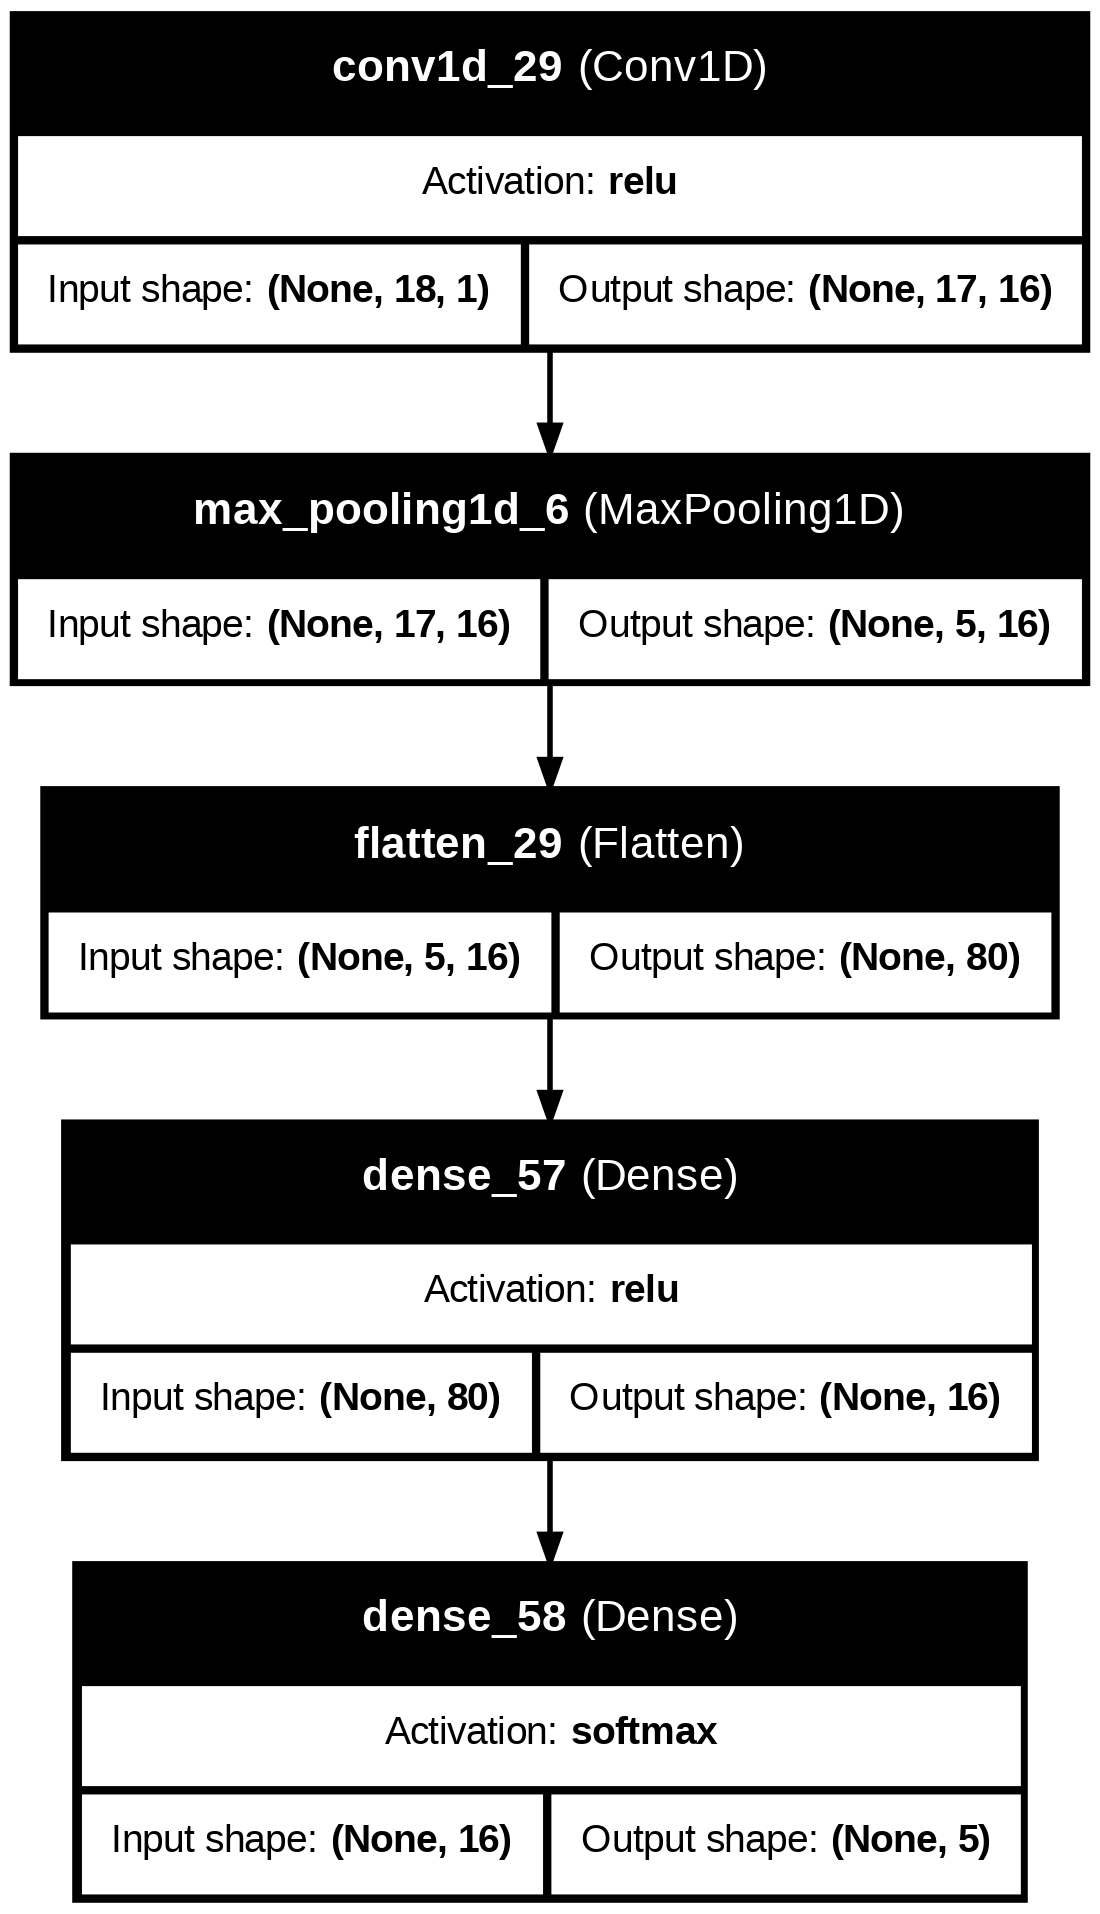

In [ ]:
from tensorflow.keras.utils import plot_model

def build_model():
    model = Sequential()

    # Input layer
    model.add(Input(shape=(18, 1)))
    model.add(Conv1D(
        filters=16,   #
        kernel_size=2,
        activation='relu',
        kernel_regularizer=l2(0.001)  # Nilai tetap untuk L2 regularization
    ))
    model.add(MaxPooling1D(pool_size=3))
    model.add(Flatten())
    model.add(Dense(
        units=16,
        activation='relu',
        kernel_regularizer=l2(0.001)  # Nilai tetap untuk L2 regularization
    ))
    # model.add(Dropout(0.4))  # Nilai tetap untuk dropout

    # Output layer
    model.add(Dense(len(classes), activation='softmax'))

    # Optimizer dengan nilai tetap
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                  patience=5,
                                                  verbose=1)]

early_model = build_model()
# Plot and save the model architecture
plot_model(early_model, to_file="early_model_plot.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)


Fold 1
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.2922 - loss: 2.0723 - val_accuracy: 0.4000 - val_loss: 1.9117 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4367 - loss: 1.7634 - val_accuracy: 0.4000 - val_loss: 1.6736 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3976 - loss: 1.6149 - val_accuracy: 0.4000 - val_loss: 1.5597 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3976 - loss: 1.5534 - val_accuracy: 0.4000 - val_loss: 1.5042 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3976 - loss: 1.5221 - val_accuracy: 0.3333 - val_loss: 1.4685 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3260 - loss: 1.4999 - val_accuracy: 0.2667 - val_loss: 1.4418 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2366 - loss: 1.4806 

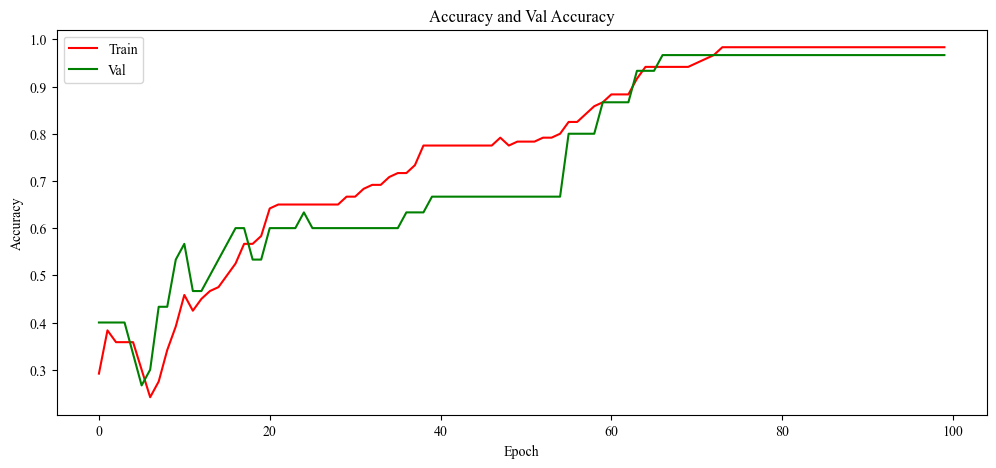

Accuracy Fold 1: 0.9667

Fold 2
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.1229 - loss: 1.8671 - val_accuracy: 0.2000 - val_loss: 1.6089 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1922 - loss: 1.5817 - val_accuracy: 0.3000 - val_loss: 1.4846 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2771 - loss: 1.4975 - val_accuracy: 0.4667 - val_loss: 1.4310 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3786 - loss: 1.4481 - val_accuracy: 0.4667 - val_loss: 1.3943 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4393 - loss: 1.4028 - val_accuracy: 0.4333 - val_loss: 1.3636 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4493 - loss: 1.3698 - val_accuracy: 0.5000 - val_loss: 1.3312 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

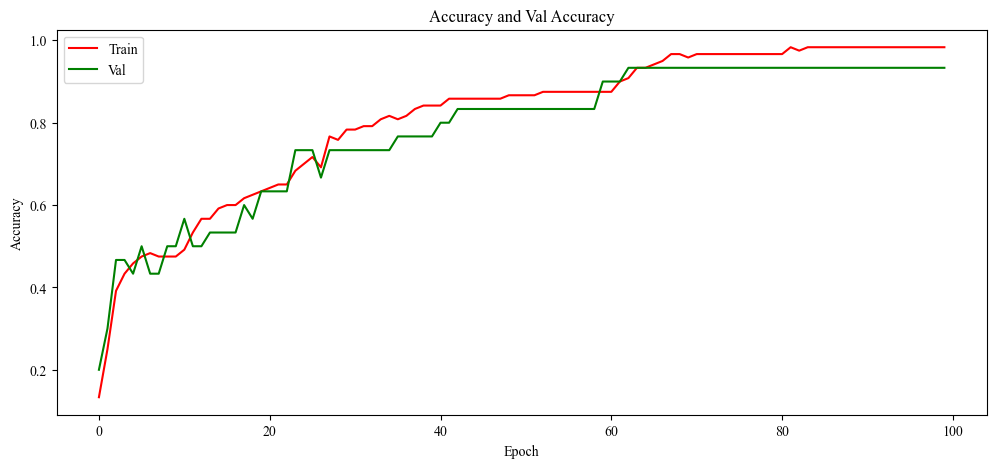

Accuracy Fold 2: 0.9333

Fold 3
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.2381 - loss: 1.6687 - val_accuracy: 0.2000 - val_loss: 1.5969 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2787 - loss: 1.5598 - val_accuracy: 0.3333 - val_loss: 1.5506 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3224 - loss: 1.5302 - val_accuracy: 0.2667 - val_loss: 1.5245 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2348 - loss: 1.5111 - val_accuracy: 0.3000 - val_loss: 1.4977 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2574 - loss: 1.4875 - val_accuracy: 0.4000 - val_loss: 1.4709 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3519 - loss: 1.4618 - val_accuracy: 0.4667 - val_loss: 1.4477 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

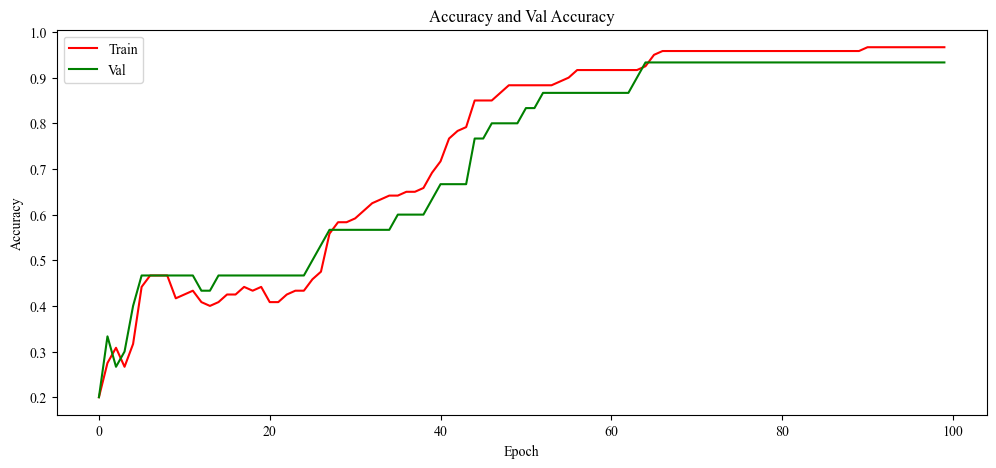

Accuracy Fold 3: 0.9333

Fold 4
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2381 - loss: 1.7027 - val_accuracy: 0.2000 - val_loss: 1.6279 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3094 - loss: 1.5757 - val_accuracy: 0.2667 - val_loss: 1.5569 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3720 - loss: 1.5237 - val_accuracy: 0.4333 - val_loss: 1.5255 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4240 - loss: 1.4880 - val_accuracy: 0.4000 - val_loss: 1.4992 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4240 - loss: 1.4523 - val_accuracy: 0.4000 - val_loss: 1.4833 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4273 - loss: 1.4281 - val_accuracy: 0.4000 - val_loss: 1.4681 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

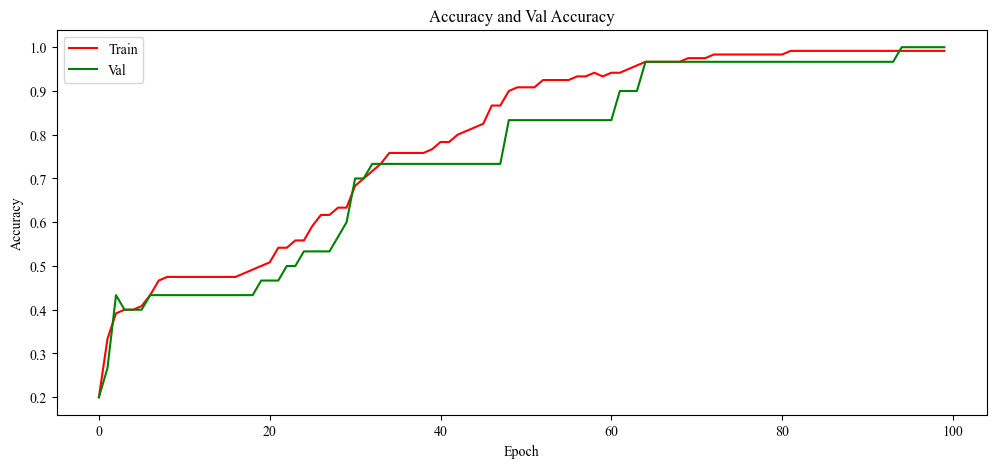

Accuracy Fold 4: 1.0000

Fold 5
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.2381 - loss: 2.8718 - val_accuracy: 0.2000 - val_loss: 2.2220 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2381 - loss: 2.0198 - val_accuracy: 0.2000 - val_loss: 1.7186 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2453 - loss: 1.6595 - val_accuracy: 0.3000 - val_loss: 1.5217 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4243 - loss: 1.5506 - val_accuracy: 0.3667 - val_loss: 1.4919 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3874 - loss: 1.5526 - val_accuracy: 0.3333 - val_loss: 1.4863 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2990 - loss: 1.5517 - val_accuracy: 0.3333 - val_loss: 1.4709 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

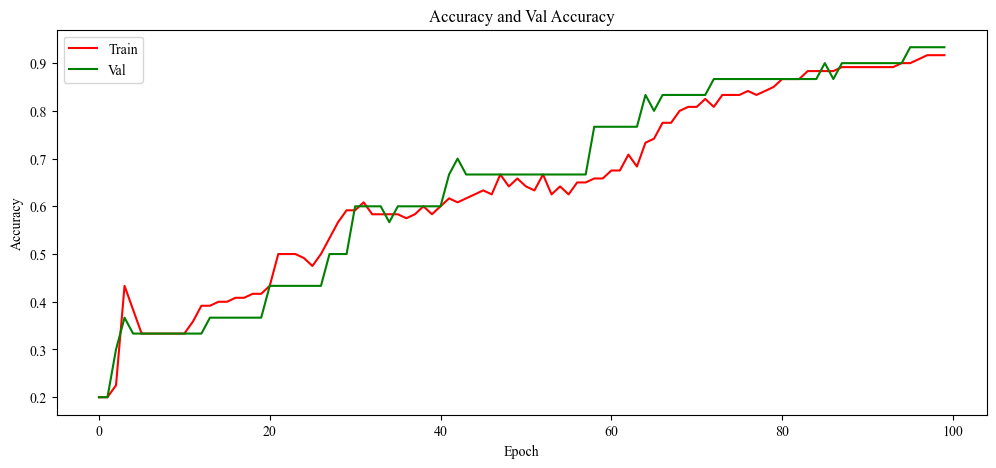

Accuracy Fold 5: 0.9333

Average Accuracy: 0.9533


In [ ]:
X = df.iloc[:, :-2].values
y = df['Label'].values
accuracies = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\nFold {fold}")

    # Split data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Convert to tf.data.Dataset
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

    # Shuffle, batch, cache, prefetch
    train_ds = train_ds.shuffle(buffer_size=len(X_train), seed=42) \
                       .batch(12) \
                       .cache() \
                       .prefetch(tf.data.AUTOTUNE)

    val_ds = val_ds.batch(12).cache().prefetch(tf.data.AUTOTUNE)

    model = build_model()
    hist = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=callbacks)

    plt.figure(figsize=(12, 5))
    # Plot untuk accuracy dan val_accuracy
    plt.title("Accuracy and Val Accuracy")
    plt.plot(hist.history['accuracy'], label='Train', color='red')  # Gunakan label, bukan labels
    plt.plot(hist.history['val_accuracy'], label='Val', color='green')  # Gunakan label, bukan labels
    plt.legend()  # Panggil legend setelah semua plot ditambahkan
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    # Evaluate
    loss, acc = model.evaluate(val_ds, verbose=0)
    print(f"Accuracy Fold {fold}: {acc:.4f}")

    accuracies.append(acc)

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")


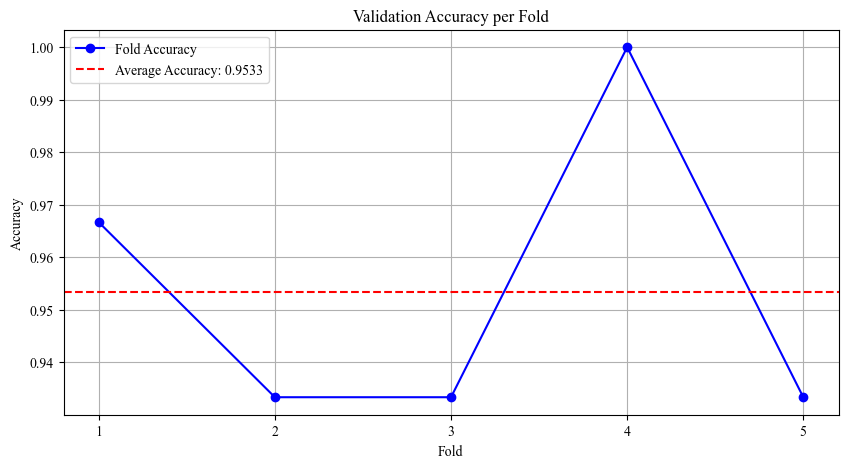

In [ ]:
# Visualisasi akurasi tiap fold
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='blue', label='Fold Accuracy')
plt.axhline(np.mean(accuracies), color='red', linestyle='--', label=f'Average Accuracy: {np.mean(accuracies):.4f}')
plt.title("Validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(accuracies) + 1))
plt.legend()
plt.grid(True)
plt.show()

# Modelling tanpa Maxpooling

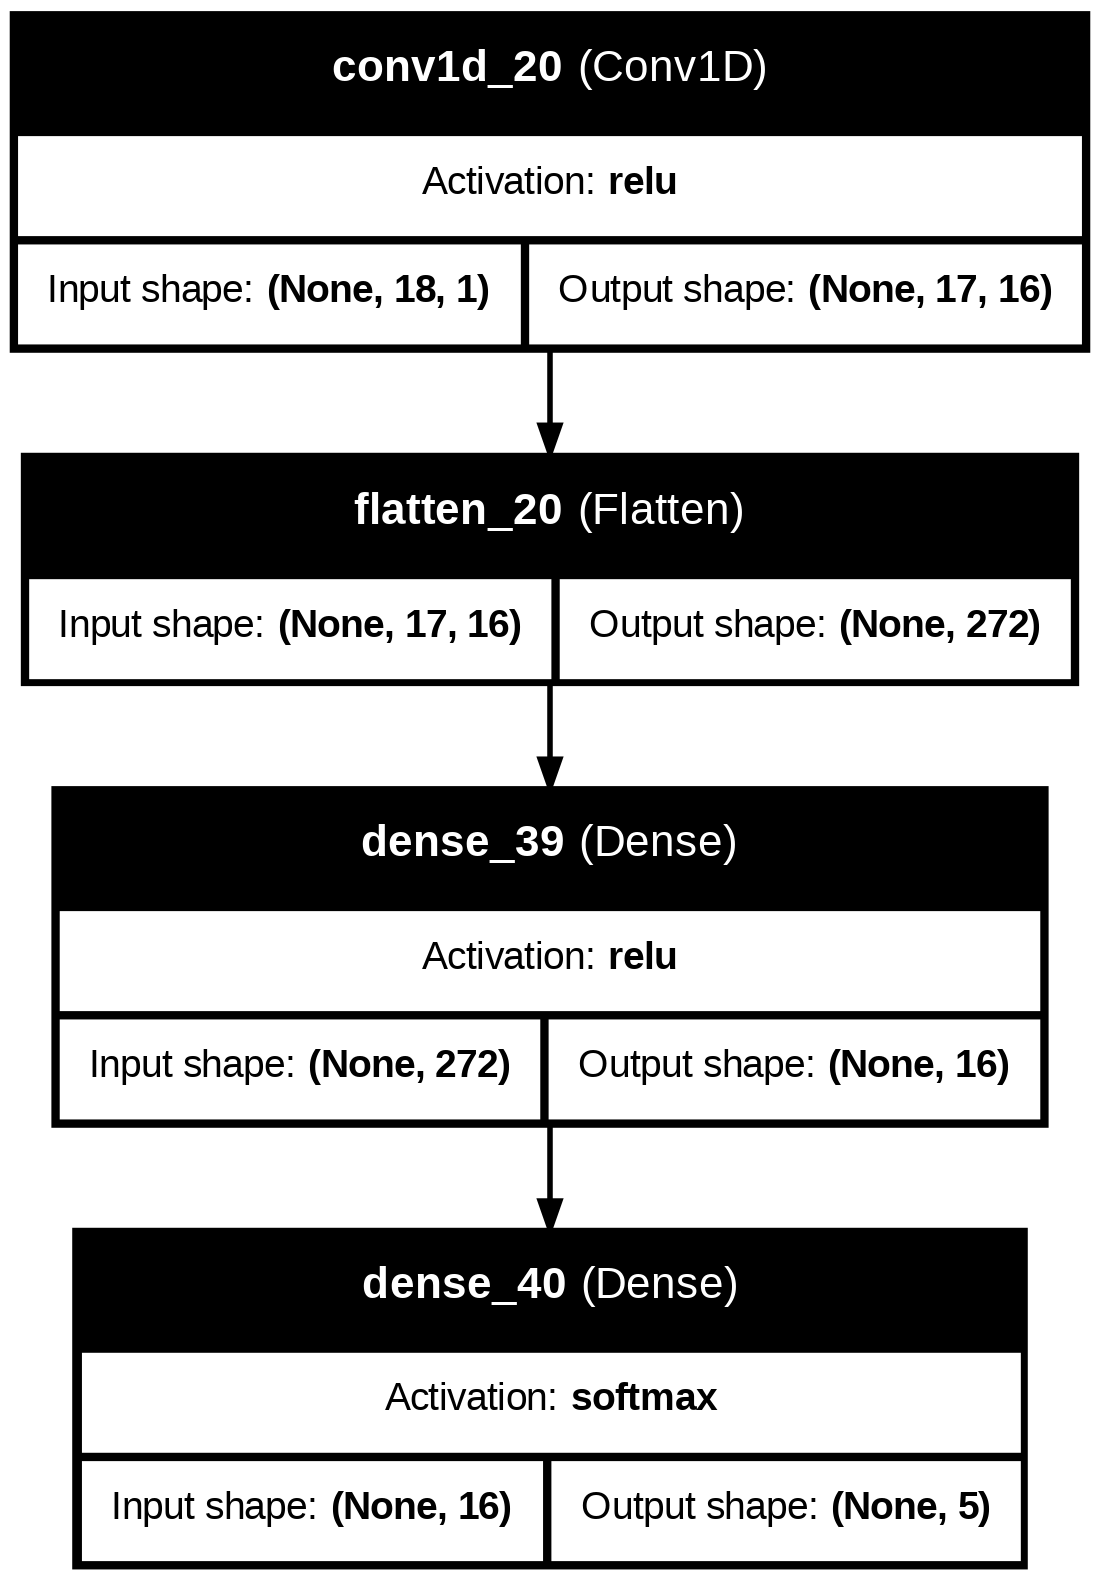

In [ ]:
from tensorflow.keras.utils import plot_model

def build_model():
    model = Sequential()

    # Input layer
    model.add(Input(shape=(18, 1)))
    model.add(Conv1D(
        filters=16,   #
        kernel_size=2,
        activation='relu',
        kernel_regularizer=l2(0.001)  # Nilai tetap untuk L2 regularization
    ))
    model.add(Flatten())
    model.add(Dense(
        units=16,
        activation='relu',
        kernel_regularizer=l2(0.001)  # Nilai tetap untuk L2 regularization
    ))
    # model.add(Dropout(0.4))  # Nilai tetap untuk dropout

    # Output layer
    model.add(Dense(len(classes), activation='softmax'))

    # Optimizer dengan nilai tetap
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                  patience=5,
                                                  verbose=1)]

early_model = build_model()
# Plot and save the model architecture
plot_model(early_model, to_file="early_model_plot.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)


Fold 1
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.1274 - loss: 1.8094 - val_accuracy: 0.2000 - val_loss: 1.8223 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1859 - loss: 1.6491 - val_accuracy: 0.2000 - val_loss: 1.6815 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1907 - loss: 1.5770 - val_accuracy: 0.2333 - val_loss: 1.5791 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2969 - loss: 1.5192 - val_accuracy: 0.4667 - val_loss: 1.5119 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3669 - loss: 1.4743 - val_accuracy: 0.4000 - val_loss: 1.4676 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3701 - loss: 1.4346 - val_accuracy: 0.5000 - val_loss: 1.4356 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3826 - loss: 1.3924 

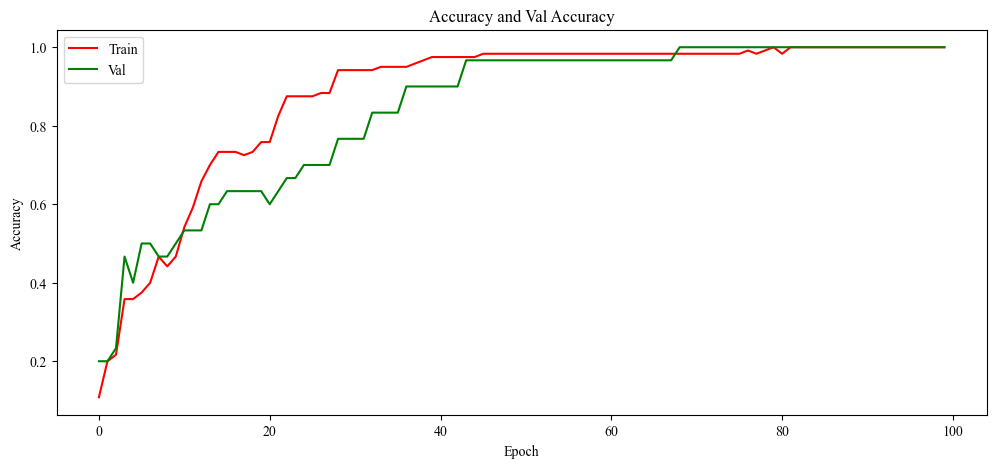

Accuracy Fold 1: 1.0000

Fold 2
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2112 - loss: 1.7072 - val_accuracy: 0.3333 - val_loss: 1.5664 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2490 - loss: 1.5917 - val_accuracy: 0.4667 - val_loss: 1.4792 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4092 - loss: 1.5401 - val_accuracy: 0.7000 - val_loss: 1.4181 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5381 - loss: 1.4860 - val_accuracy: 0.6667 - val_loss: 1.3673 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5545 - loss: 1.4387 - val_accuracy: 0.7000 - val_loss: 1.3157 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5776 - loss: 1.3918 - val_accuracy: 0.7000 - val_loss: 1.2704 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

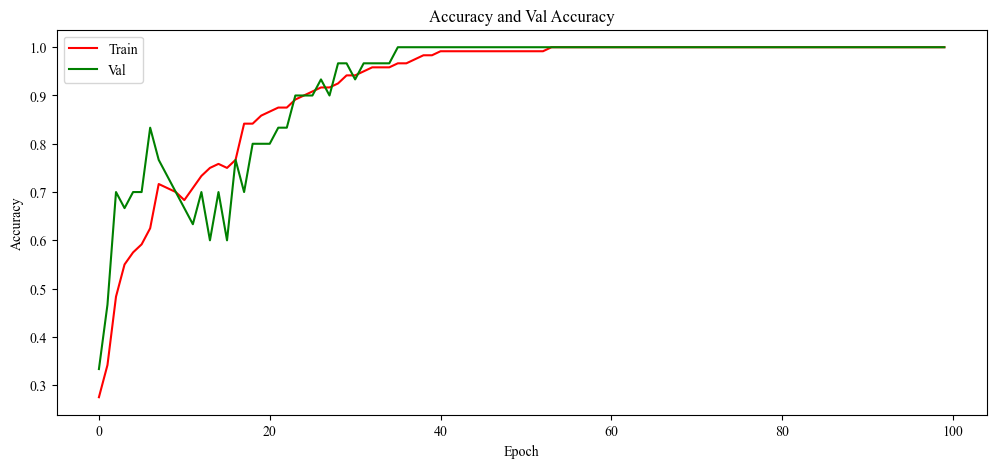

Accuracy Fold 2: 1.0000

Fold 3
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.2443 - loss: 2.1328 - val_accuracy: 0.1667 - val_loss: 1.8010 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2482 - loss: 1.6734 - val_accuracy: 0.0667 - val_loss: 1.6752 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2954 - loss: 1.6132 - val_accuracy: 0.0667 - val_loss: 1.6506 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1603 - loss: 1.6092 - val_accuracy: 0.1333 - val_loss: 1.6163 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2654 - loss: 1.5748 - val_accuracy: 0.1667 - val_loss: 1.5852 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3067 - loss: 1.5384 - val_accuracy: 0.3000 - val_loss: 1.5608 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

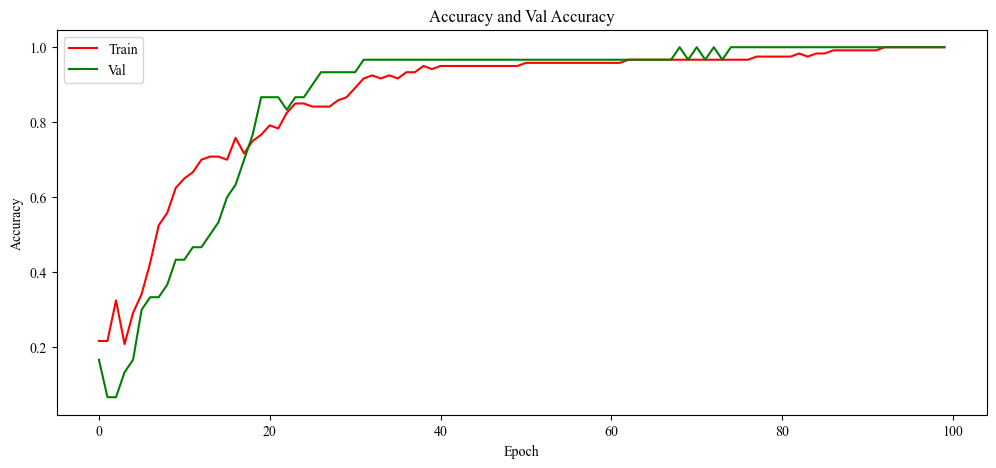

Accuracy Fold 3: 1.0000

Fold 4
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.1668 - loss: 1.9004 - val_accuracy: 0.0333 - val_loss: 1.7638 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1911 - loss: 1.5676 - val_accuracy: 0.0667 - val_loss: 1.6981 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1761 - loss: 1.5153 - val_accuracy: 0.2333 - val_loss: 1.6235 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2603 - loss: 1.4717 - val_accuracy: 0.2333 - val_loss: 1.5810 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2603 - loss: 1.4320 - val_accuracy: 0.2333 - val_loss: 1.5442 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3036 - loss: 1.3959 - val_accuracy: 0.3333 - val_loss: 1.5064 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

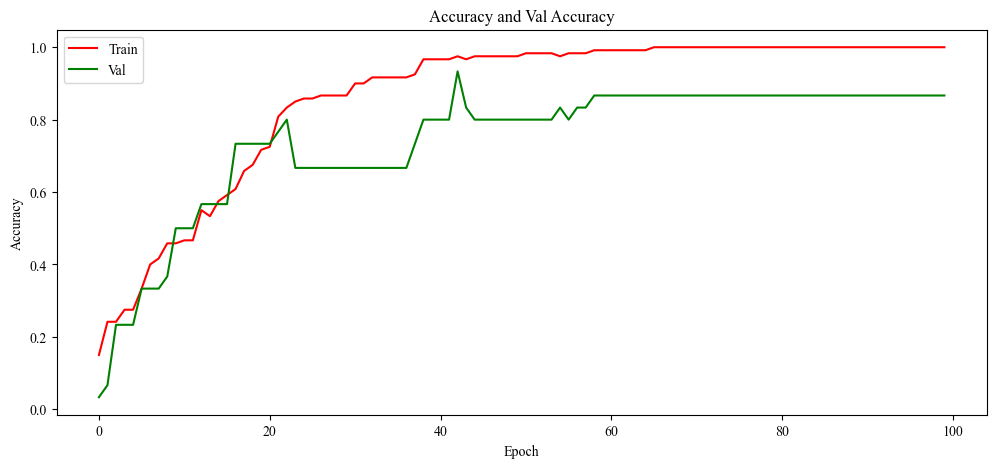

Accuracy Fold 4: 0.8667

Fold 5
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.2546 - loss: 2.0092 - val_accuracy: 0.3000 - val_loss: 1.6294 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3222 - loss: 1.5677 - val_accuracy: 0.2667 - val_loss: 1.6030 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2548 - loss: 1.5664 - val_accuracy: 0.2333 - val_loss: 1.5563 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3090 - loss: 1.5282 - val_accuracy: 0.3333 - val_loss: 1.5188 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4004 - loss: 1.4907 - val_accuracy: 0.4000 - val_loss: 1.4767 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4216 - loss: 1.4529 - val_accuracy: 0.3000 - val_loss: 1.4419 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy

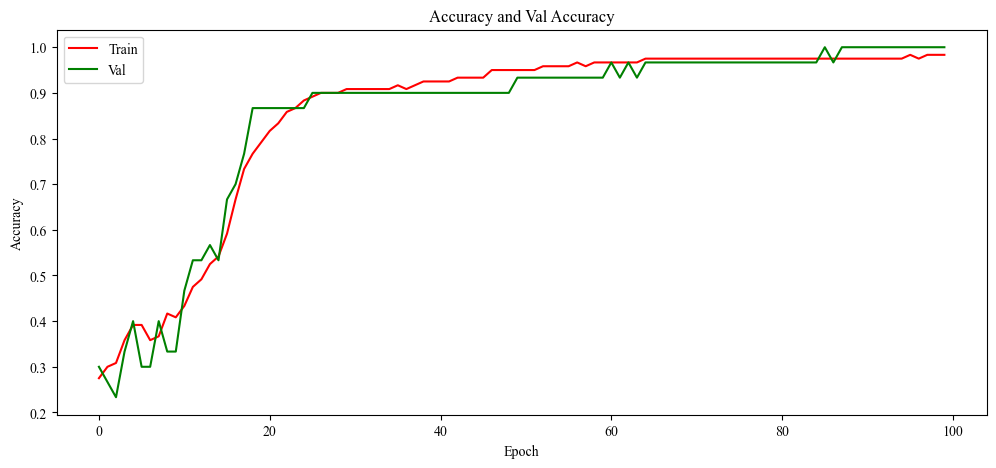

Accuracy Fold 5: 1.0000

Average Accuracy: 0.9733


In [ ]:
X = df.iloc[:, :-2].values
y = df['Label'].values
accuracies = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\nFold {fold}")

    # Split data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Convert to tf.data.Dataset
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

    # Shuffle, batch, cache, prefetch
    train_ds = train_ds.shuffle(buffer_size=len(X_train), seed=42) \
                       .batch(12) \
                       .cache() \
                       .prefetch(tf.data.AUTOTUNE)

    val_ds = val_ds.batch(12).cache().prefetch(tf.data.AUTOTUNE)

    model = build_model()
    hist = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=callbacks)

    plt.figure(figsize=(12, 5))
    # Plot untuk accuracy dan val_accuracy
    plt.title("Accuracy and Val Accuracy")
    plt.plot(hist.history['accuracy'], label='Train', color='red')  # Gunakan label, bukan labels
    plt.plot(hist.history['val_accuracy'], label='Val', color='green')  # Gunakan label, bukan labels
    plt.legend()  # Panggil legend setelah semua plot ditambahkan
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    # Evaluate
    loss, acc = model.evaluate(val_ds, verbose=0)
    print(f"Accuracy Fold {fold}: {acc:.4f}")

    accuracies.append(acc)

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")

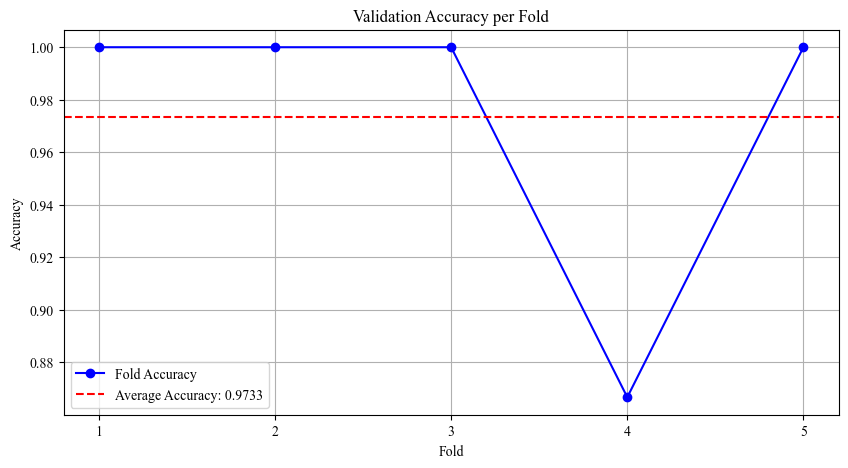

In [ ]:
# Visualisasi akurasi tiap fold
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='blue', label='Fold Accuracy')
plt.axhline(np.mean(accuracies), color='red', linestyle='--', label=f'Average Accuracy: {np.mean(accuracies):.4f}')
plt.title("Validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(accuracies) + 1))
plt.legend()
plt.grid(True)
plt.show()

## Finding Best Hyperparameter

In [ ]:
def build_model(hp):
    model = Sequential()
    # Input layer
    model.add(Input(shape=(18,1)))
    model.add(Conv1D(
        filters=hp.Int('filters', min_value=16, max_value=64, step=16),
        kernel_size=hp.Choice('kernel_size', values=[3, 5]),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg_conv', min_value=0.0001, max_value=0.01, sampling='LOG'))
    ))
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=128, step=16),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg_dense', min_value=0.0001, max_value=0.01, sampling='LOG'))
    ))
    # Output layer
    model.add(Dense(len(classes), activation='softmax'))
    # Hyperparameter untuk optimizer
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                  patience=5,
                                                  verbose=1),
             CSVLogger('hp_log.csv', append=True)]

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    directory='best_params_grid_layer',
    project_name='hptuning',
    max_trials=5,
    executions_per_trial=3,
    seed=42
)
tuner.search(train_ds, validation_data=val_ds, epochs=100, callbacks=callbacks)

Trial 5 Complete [00h 00m 30s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 10s


In [ ]:
!rm -rf best_params_grid_layer

## Build Hyperparameter Dataframe


In [ ]:
data = []
# Melihat semua percobaan yang telah dilakukan
trials = tuner.oracle.trials

# Iterasi setiap trial
for trial_id, trial in trials.items():
    row = {
        "Trial ID": trial_id,
        "Score": trial.score
    }
    # Tambahkan semua hyperparameter ke dalam dictionary
    row.update(trial.hyperparameters.values)

    # Tambahkan ke list
    data.append(row)

# Buat DataFrame
df_trials = pd.DataFrame(data)
df_trials = df_trials.sort_values(by="Score", ascending=False)
# Tampilkan DataFrame
display(df_trials)

Trial ID     Score  filters  kernel_size  l2_reg_conv  dense_units  \
0        0  1.000000       48            3     0.000656           48   
4        4  1.000000       64            3     0.000140           48   
2        2  0.933333       64            3     0.001450           32   
1        1  0.922222       16            3     0.000307          128   
3        3  0.711111       32            3     0.000675           16   

   l2_reg_dense optimizer  learning_rate  
0      0.005978      adam         0.0010  
4      0.005242      adam         0.0010  
2      0.000413      adam         0.0001  
1      0.001715   rmsprop         0.0100  
3      0.000141   rmsprop         0.0001

In [ ]:
print(tuner.get_best_hyperparameters()[0].values)

{'filters': 48, 'kernel_size': 3, 'l2_reg_conv': 0.0006562536901904111, 'dense_units': 48, 'l2_reg_dense': 0.005977728042983696, 'optimizer': 'adam', 'learning_rate': 0.001}


### Save Hyperparameter df

In [ ]:
df_trials.to_excel("Hyperparameters.xlsx", index=False)

# Modelling Using Best Parameter


Fold 1
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.2651 - loss: 2.1802 - val_accuracy: 0.2000 - val_loss: 1.9714 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2595 - loss: 1.9394 - val_accuracy: 0.4333 - val_loss: 1.7638 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4485 - loss: 1.7237 - val_accuracy: 0.4333 - val_loss: 1.6394 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5834 - loss: 1.5730 - val_accuracy: 0.4667 - val_loss: 1.5271 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5566 - loss: 1.4590 - val_accuracy: 0.5000 - val_loss: 1.4293 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5788 - loss: 1.3487 - val_accuracy: 0.5667 - val_loss: 1.3228 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6688 - loss: 1.2636 

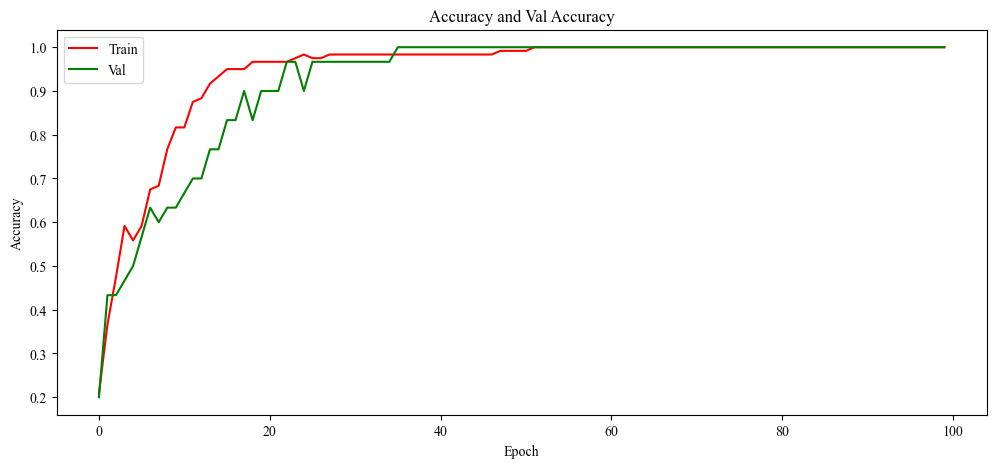

Accuracy Fold 1: 1.0000

Fold 2
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3198 - loss: 2.2166 - val_accuracy: 0.3000 - val_loss: 1.9603 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2780 - loss: 1.9526 - val_accuracy: 0.3667 - val_loss: 1.7237 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4023 - loss: 1.6635 - val_accuracy: 0.5000 - val_loss: 1.5807 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - loss: 1.4799 - val_accuracy: 0.3667 - val_loss: 1.4486 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5131 - loss: 1.3786 - val_accuracy: 0.5000 - val_loss: 1.3188 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6538 - loss: 1.2584 - val_accuracy: 0.5333 - val_loss: 1.2044 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

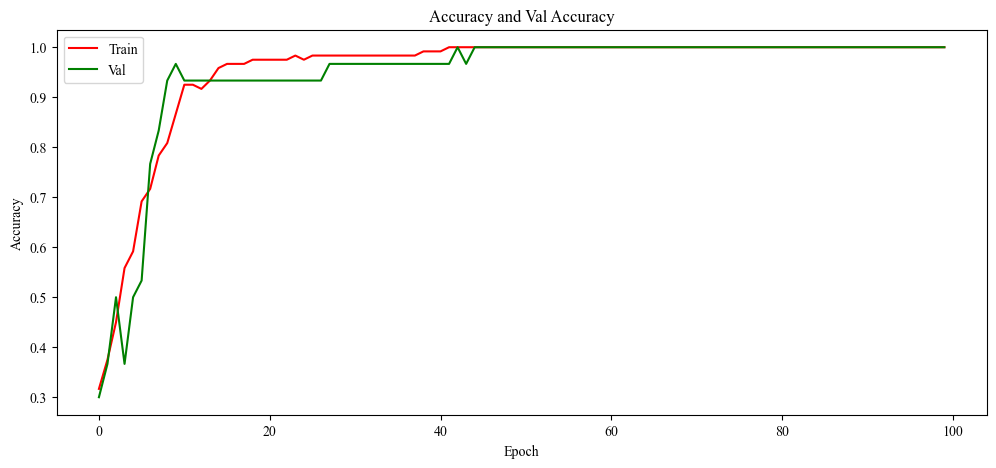

Accuracy Fold 2: 1.0000

Fold 3
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.3161 - loss: 2.1486 - val_accuracy: 0.4667 - val_loss: 1.9231 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4762 - loss: 1.8527 - val_accuracy: 0.5667 - val_loss: 1.7024 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6411 - loss: 1.6629 - val_accuracy: 0.5667 - val_loss: 1.5590 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6466 - loss: 1.5057 - val_accuracy: 0.6000 - val_loss: 1.4261 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7467 - loss: 1.3869 - val_accuracy: 0.5667 - val_loss: 1.3259 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7533 - loss: 1.2957 - val_accuracy: 0.6667 - val_loss: 1.2242 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

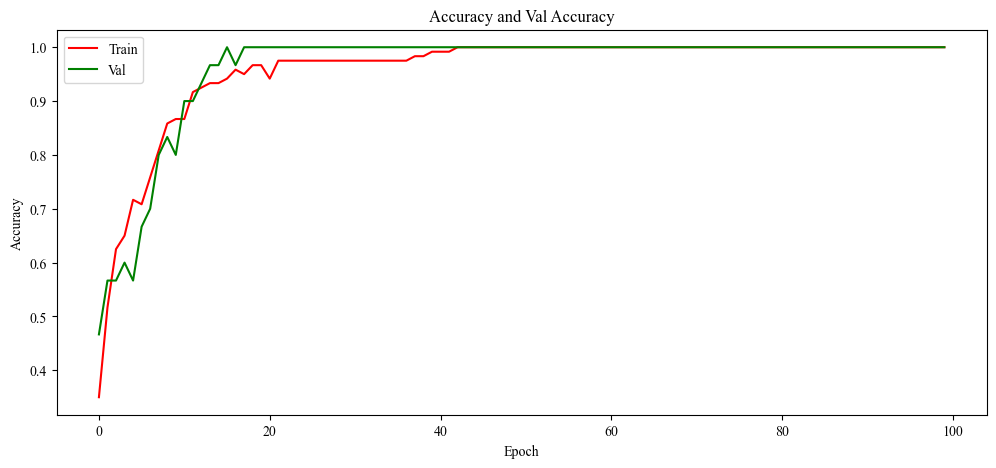

Accuracy Fold 3: 1.0000

Fold 4
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2094 - loss: 2.2134 - val_accuracy: 0.2667 - val_loss: 1.9787 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3303 - loss: 1.9239 - val_accuracy: 0.4333 - val_loss: 1.7484 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5574 - loss: 1.6246 - val_accuracy: 0.3667 - val_loss: 1.6172 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4120 - loss: 1.4848 - val_accuracy: 0.4000 - val_loss: 1.5210 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4721 - loss: 1.3831 - val_accuracy: 0.6667 - val_loss: 1.4348 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6378 - loss: 1.2744 - val_accuracy: 0.6000 - val_loss: 1.3517 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

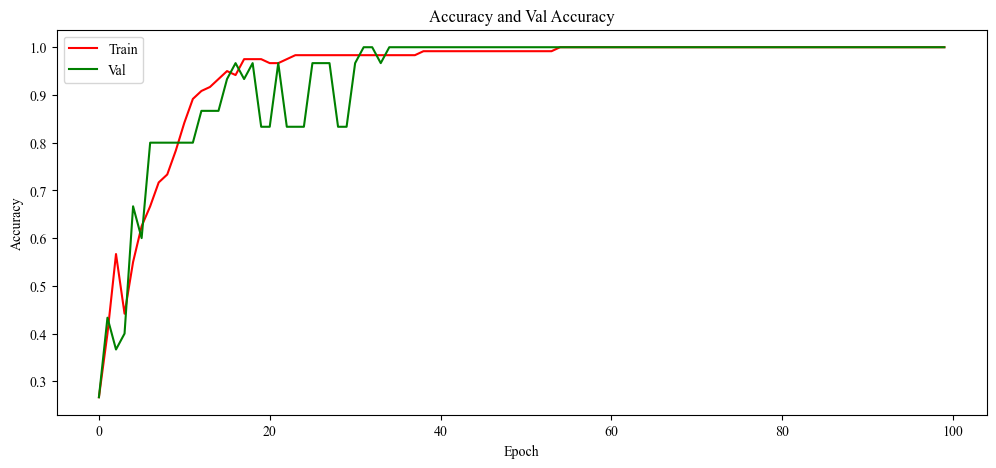

Accuracy Fold 4: 1.0000

Fold 5
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.1677 - loss: 2.1732 - val_accuracy: 0.2333 - val_loss: 1.8945 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2848 - loss: 1.8781 - val_accuracy: 0.3333 - val_loss: 1.6708 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3994 - loss: 1.6545 - val_accuracy: 0.3333 - val_loss: 1.5049 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4238 - loss: 1.5057 - val_accuracy: 0.4667 - val_loss: 1.3763 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5301 - loss: 1.3900 - val_accuracy: 0.6000 - val_loss: 1.2741 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6468 - loss: 1.2928 - val_accuracy: 0.6333 - val_loss: 1.1863 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

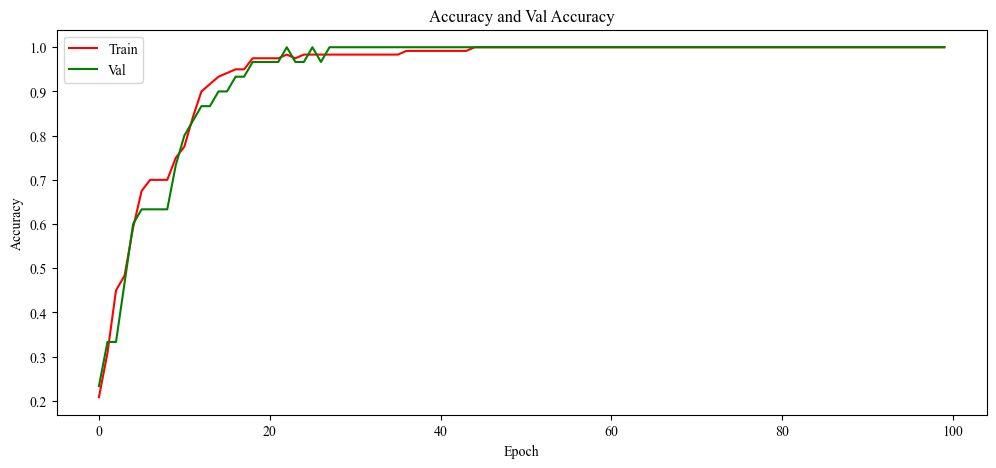

Accuracy Fold 5: 1.0000

Average Accuracy: 1.0000


In [ ]:
X = df.iloc[:, :-2].values
y = df['Label'].values
accuracies = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\nFold {fold}")

    # Split data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Convert to tf.data.Dataset
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

    # Shuffle, batch, cache, prefetch
    train_ds = train_ds.shuffle(buffer_size=len(X_train), seed=42) \
                       .batch(12) \
                       .cache() \
                       .prefetch(tf.data.AUTOTUNE)

    val_ds = val_ds.batch(12).cache().prefetch(tf.data.AUTOTUNE)

    best_hp = tuner.get_best_hyperparameters()[0]
    model = tuner.hypermodel.build(best_hp)
    hist = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=callbacks)

    plt.figure(figsize=(12, 5))
    # Plot untuk accuracy dan val_accuracy
    plt.title("Accuracy and Val Accuracy")
    plt.plot(hist.history['accuracy'], label='Train', color='red')  # Gunakan label, bukan labels
    plt.plot(hist.history['val_accuracy'], label='Val', color='green')  # Gunakan label, bukan labels
    plt.legend()  # Panggil legend setelah semua plot ditambahkan
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    # Evaluate
    loss, acc = model.evaluate(val_ds, verbose=0)
    print(f"Accuracy Fold {fold}: {acc:.4f}")

    accuracies.append(acc)

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")

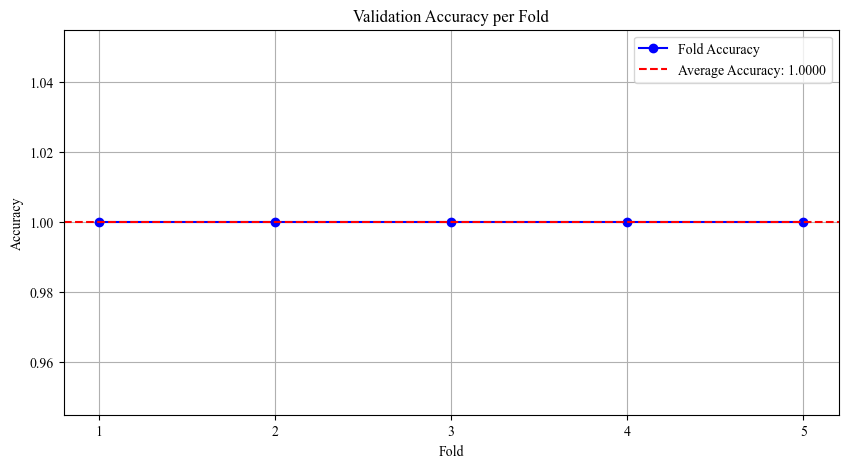

In [ ]:
# Visualisasi akurasi tiap fold
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='blue', label='Fold Accuracy')
plt.axhline(np.mean(accuracies), color='red', linestyle='--', label=f'Average Accuracy: {np.mean(accuracies):.4f}')
plt.title("Validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(accuracies) + 1))
plt.legend()
plt.grid(True)
plt.show()

# Evaluation and Plotting

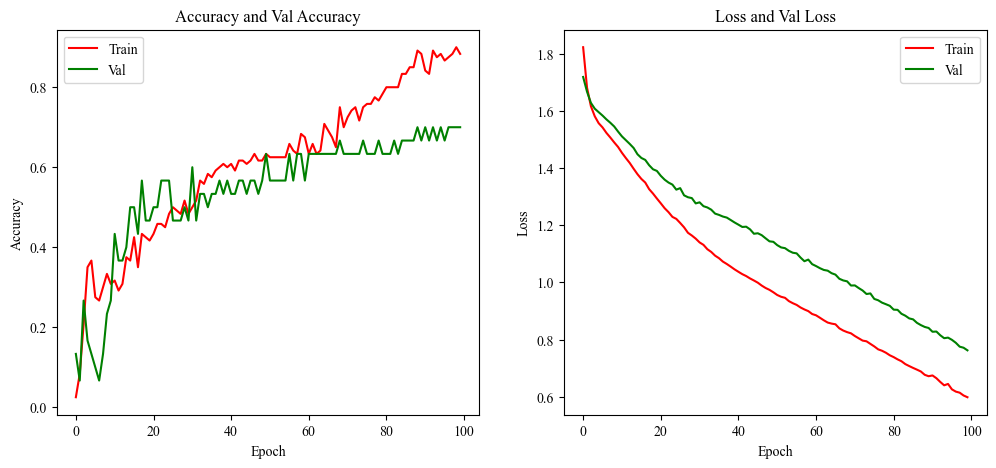

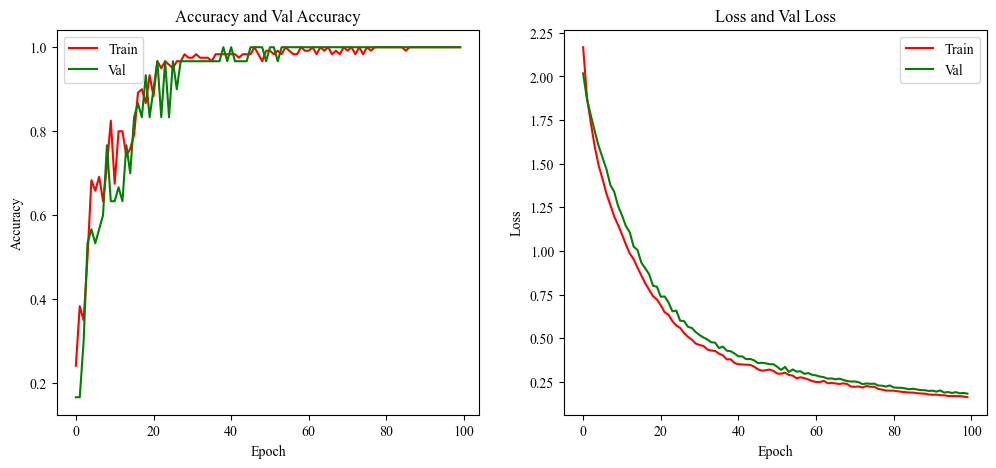

In [ ]:
plt.rcParams['font.serif'] = "Times New Roman"
plt.rcParams['font.family'] = "serif"

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Plot untuk accuracy dan val_accuracy
plt.title("Accuracy and Val Accuracy")
plt.plot(hist_early.history['accuracy'], label='Train', color='red')  # Gunakan label, bukan labels
plt.plot(hist_early.history['val_accuracy'], label='Val', color='green')  # Gunakan label, bukan labels
plt.legend()  # Panggil legend setelah semua plot ditambahkan
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
# Plot untuk loss dan val_loss
plt.title("Loss and Val Loss")
plt.plot(hist_early.history['loss'], label='Train', color='red')  # Gunakan label, bukan labels
plt.plot(hist_early.history['val_loss'], label='Val', color='green')  # Gunakan label, bukan labels
plt.legend()  # Panggil legend setelah semua plot ditambahkan
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Plot untuk accuracy dan val_accuracy
plt.title("Accuracy and Val Accuracy")
plt.plot(hist.history['accuracy'], label='Train', color='red')  # Gunakan label, bukan labels
plt.plot(hist.history['val_accuracy'], label='Val', color='green')  # Gunakan label, bukan labels
plt.legend()  # Panggil legend setelah semua plot ditambahkan
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
# Plot untuk loss dan val_loss
plt.title("Loss and Val Loss")
plt.plot(hist.history['loss'], label='Train', color='red')  # Gunakan label, bukan labels
plt.plot(hist.history['val_loss'], label='Val', color='green')  # Gunakan label, bukan labels
plt.legend()  # Panggil legend setelah semua plot ditambahkan
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Model Awal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
                precision    recall  f1-score   support

        Bitter       0.75      1.00      0.86         6
         Ideal       0.67      1.00      0.80         6
        Strong       1.00      1.00      1.00         6
Underdeveloped       1.00      0.33      0.50         6
          Weak       0.20      0.17      0.18         6

      accuracy                           0.70        30
     macro avg       0.72      0.70      0.67        30
  weighted avg       0.72      0.70      0.67        30



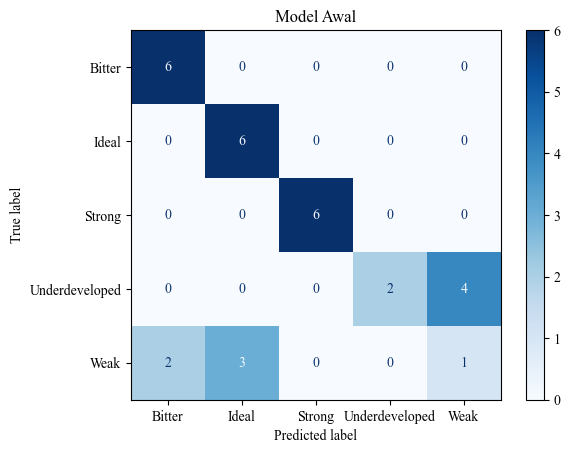

Model Setelah dilakukan hyperparameter tune
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
                precision    recall  f1-score   support

        Bitter       1.00      1.00      1.00         6
         Ideal       1.00      1.00      1.00         6
        Strong       1.00      1.00      1.00         6
Underdeveloped       1.00      1.00      1.00         6
          Weak       1.00      1.00      1.00         6

      accuracy                           1.00        30
     macro avg       1.00      1.00      1.00        30
  weighted avg       1.00      1.00      1.00        30



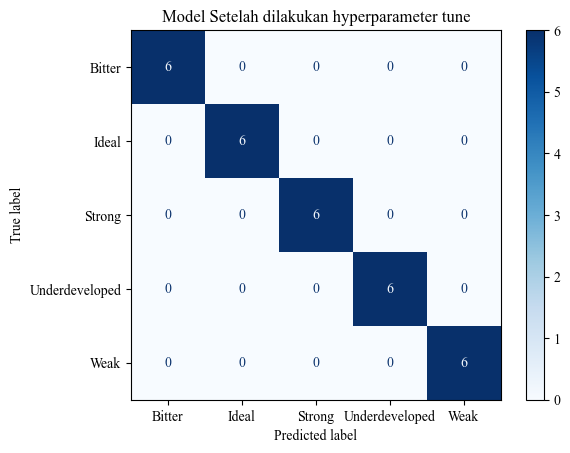

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Konversi tf.data.Dataset ke array NumPy
X_test_array = np.array(list(X_test.as_numpy_iterator()))
y_test_array = np.array(list(y_test.as_numpy_iterator()))

# Lakukan prediksi Menggunakan Model Awal
print("Model Awal")
y_pred = early_model.predict(X_test_array)
y_pred = np.argmax(y_pred, axis=1)
y_pred = encoder.inverse_transform(y_pred)
y_actual = encoder.inverse_transform(y_test_array)
print(classification_report(y_actual, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_actual, y_pred), display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Model Awal")
plt.show()

# Lakukan prediksi Menggunakan Model yang sudah dihyperparameter tune
print("Model Setelah dilakukan hyperparameter tune")
y_pred = model.predict(X_test_array)
y_pred = np.argmax(y_pred, axis=1)
y_pred = encoder.inverse_transform(y_pred)
y_actual = encoder.inverse_transform(y_test_array)
print(classification_report(y_actual, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_actual, y_pred), display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Model Setelah dilakukan hyperparameter tune")
plt.show()

# Save Model

In [ ]:
# h5 model
model.save("coffee_random_stratified.h5")


# tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('coffee_random_stratified.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpcc6eu5ee'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 18, 1), dtype=tf.float32, name='keras_tensor_16')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137608608138064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137608608138256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137608608140176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137608608142096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137605391604752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137605391602832: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Load Model

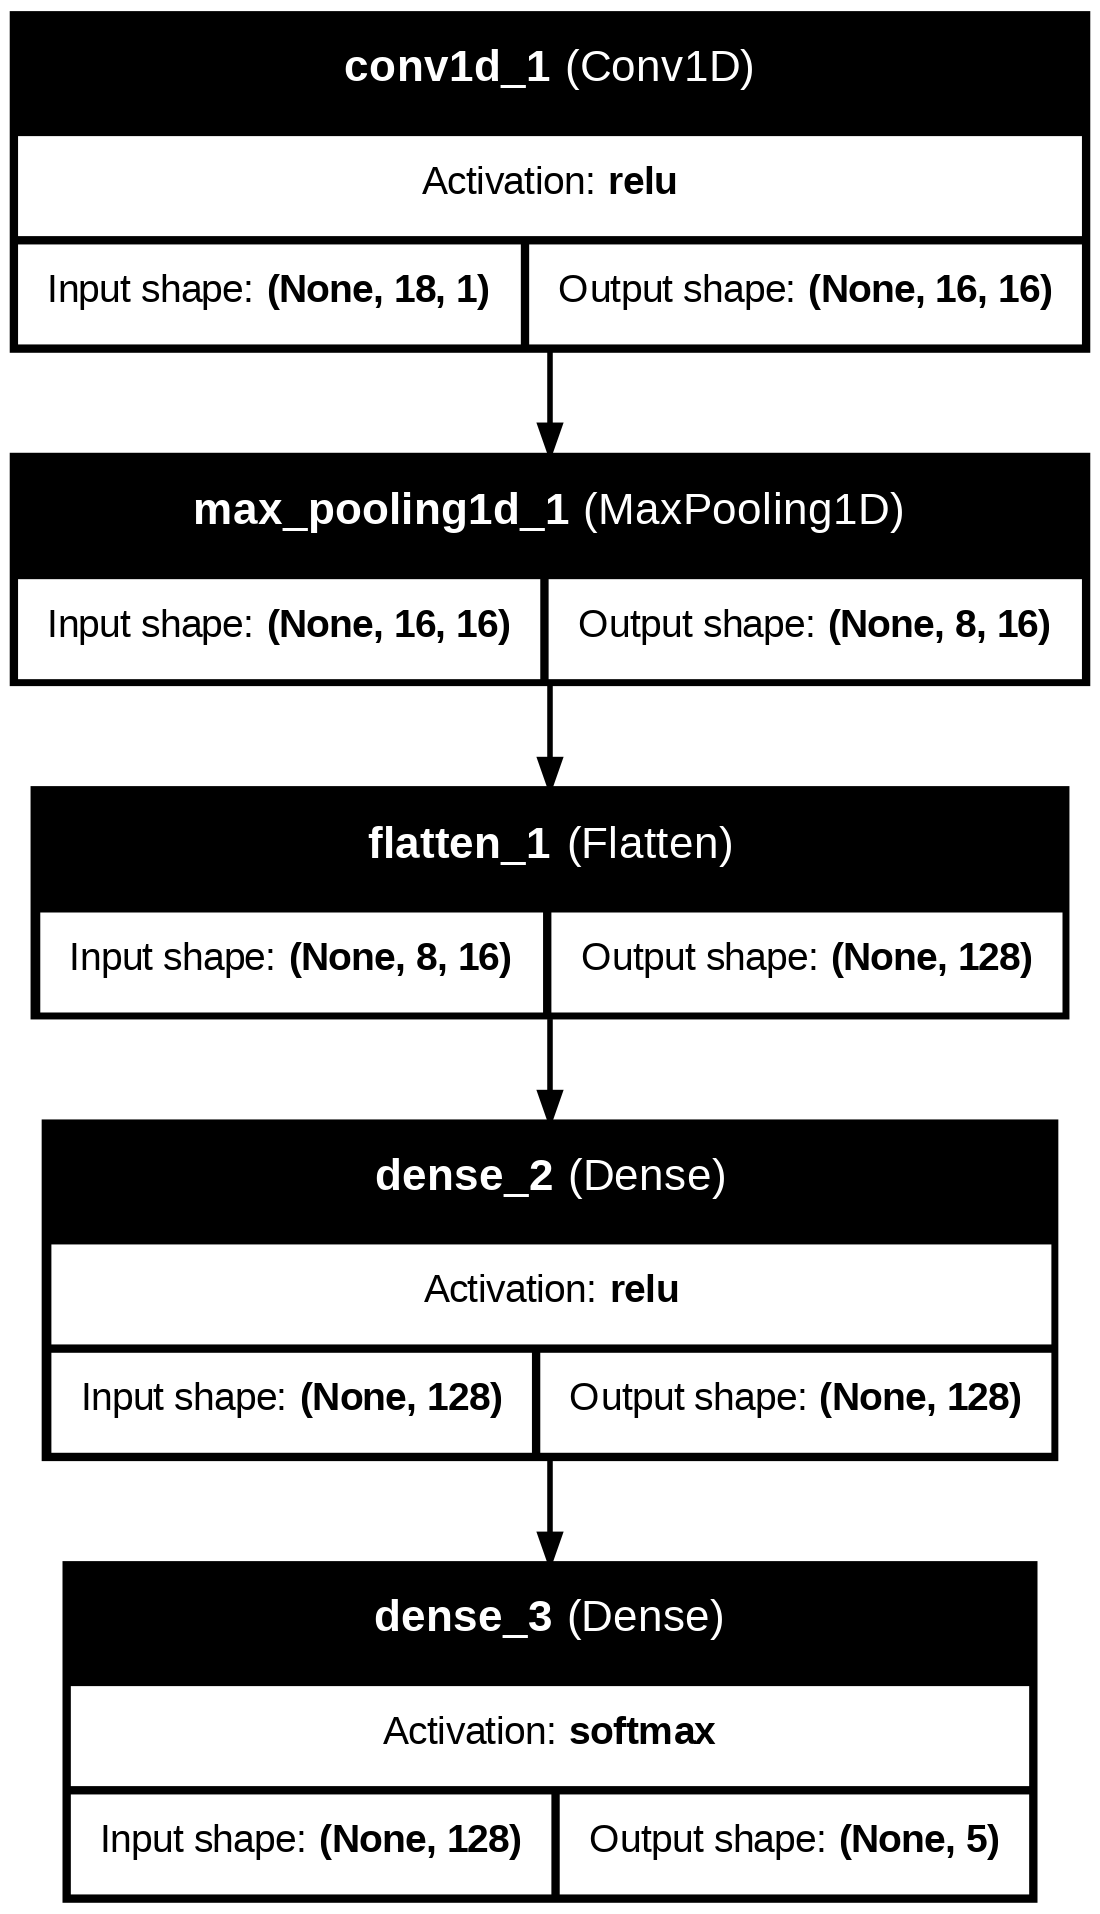

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model


# Load the model from a file (update the filename as needed)
model = load_model("coffee_random.h5")  # or "your_model_directory" if using SavedModel format
# Plot and save the model architecture
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)



In [ ]:
X = sample.iloc[:, :-2].values
y = sample['Label'].values
X.shape, y.shape

((20, 18), (20,))

In [ ]:
classes = ['Bitter','Ideal','Strong','Underdeveloped','Weak']
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis=1)
y_pred = np.array([classes[i] for i in y_pred])
print(classification_report(y_pred, y))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
                precision    recall  f1-score   support

        Bitter       1.00      1.00      1.00         3
         Ideal       1.00      1.00      1.00         5
        Strong       1.00      1.00      1.00         3
Underdeveloped       1.00      1.00      1.00         5
          Weak       1.00      1.00      1.00         4

      accuracy                           1.00        20
     macro avg       1.00      1.00      1.00        20
  weighted avg       1.00      1.00      1.00        20

